In [37]:
import pandas as pd
dataset=pd.read_csv("preplacement.csv")


In [38]:
dataset.loc[dataset['status'] == 'Not Placed', 'salary'] = 0
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [39]:
num_col=dataset.select_dtypes(include='number').columns.tolist()
num_col

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [40]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [41]:
cov_num=dataset.select_dtypes(include="number").cov()
cov_num

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,2.449065e+04
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,9.017549e+05
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,7.633598e+05
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,4.651315e+05
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,3.842344e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,1.262455e+05
salary,24490.654206,901754.893936,763359.777657,465131.504238,384234.419257,126245.485547,2.395714e+10


In [4]:
#Covariance between degree_p and etest_p
#From the table → row degree_p, column etest_p 21.929469
#Covariance between etest_p and mba_p 16.886973
#Interpretation:

# Covariance is positive in both cases 

# As degree_p increases, etest_p tends to increase too.

# As etest_p increases, mba_p also tends to increase.

In [42]:
cor_num=dataset.select_dtypes(include="number").corr()
cor_num

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


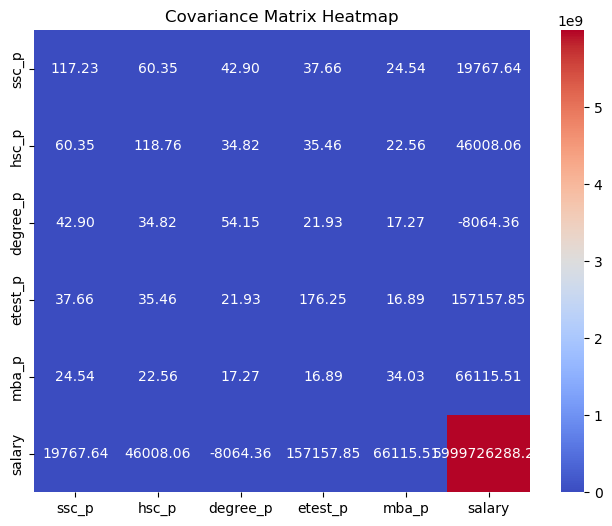

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_matrix = dataset[num_cols + [target]].cov()

plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix Heatmap")
plt.show()


In [8]:
corr_value = dataset["mba_p"].corr(dataset["salary"])
print(corr_value)

0.14632449006038745


In [ ]:
# mba_p vs salary → r = 0.1463

# This falls into the 0.00–0.19 range → Very weak positive correlation.

In [43]:
dataset.drop('sl_no',inplace=True,axis=1)

In [44]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [45]:
cor_num=dataset.select_dtypes(include="number").corr()
cor_num

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [46]:
import seaborn as sns


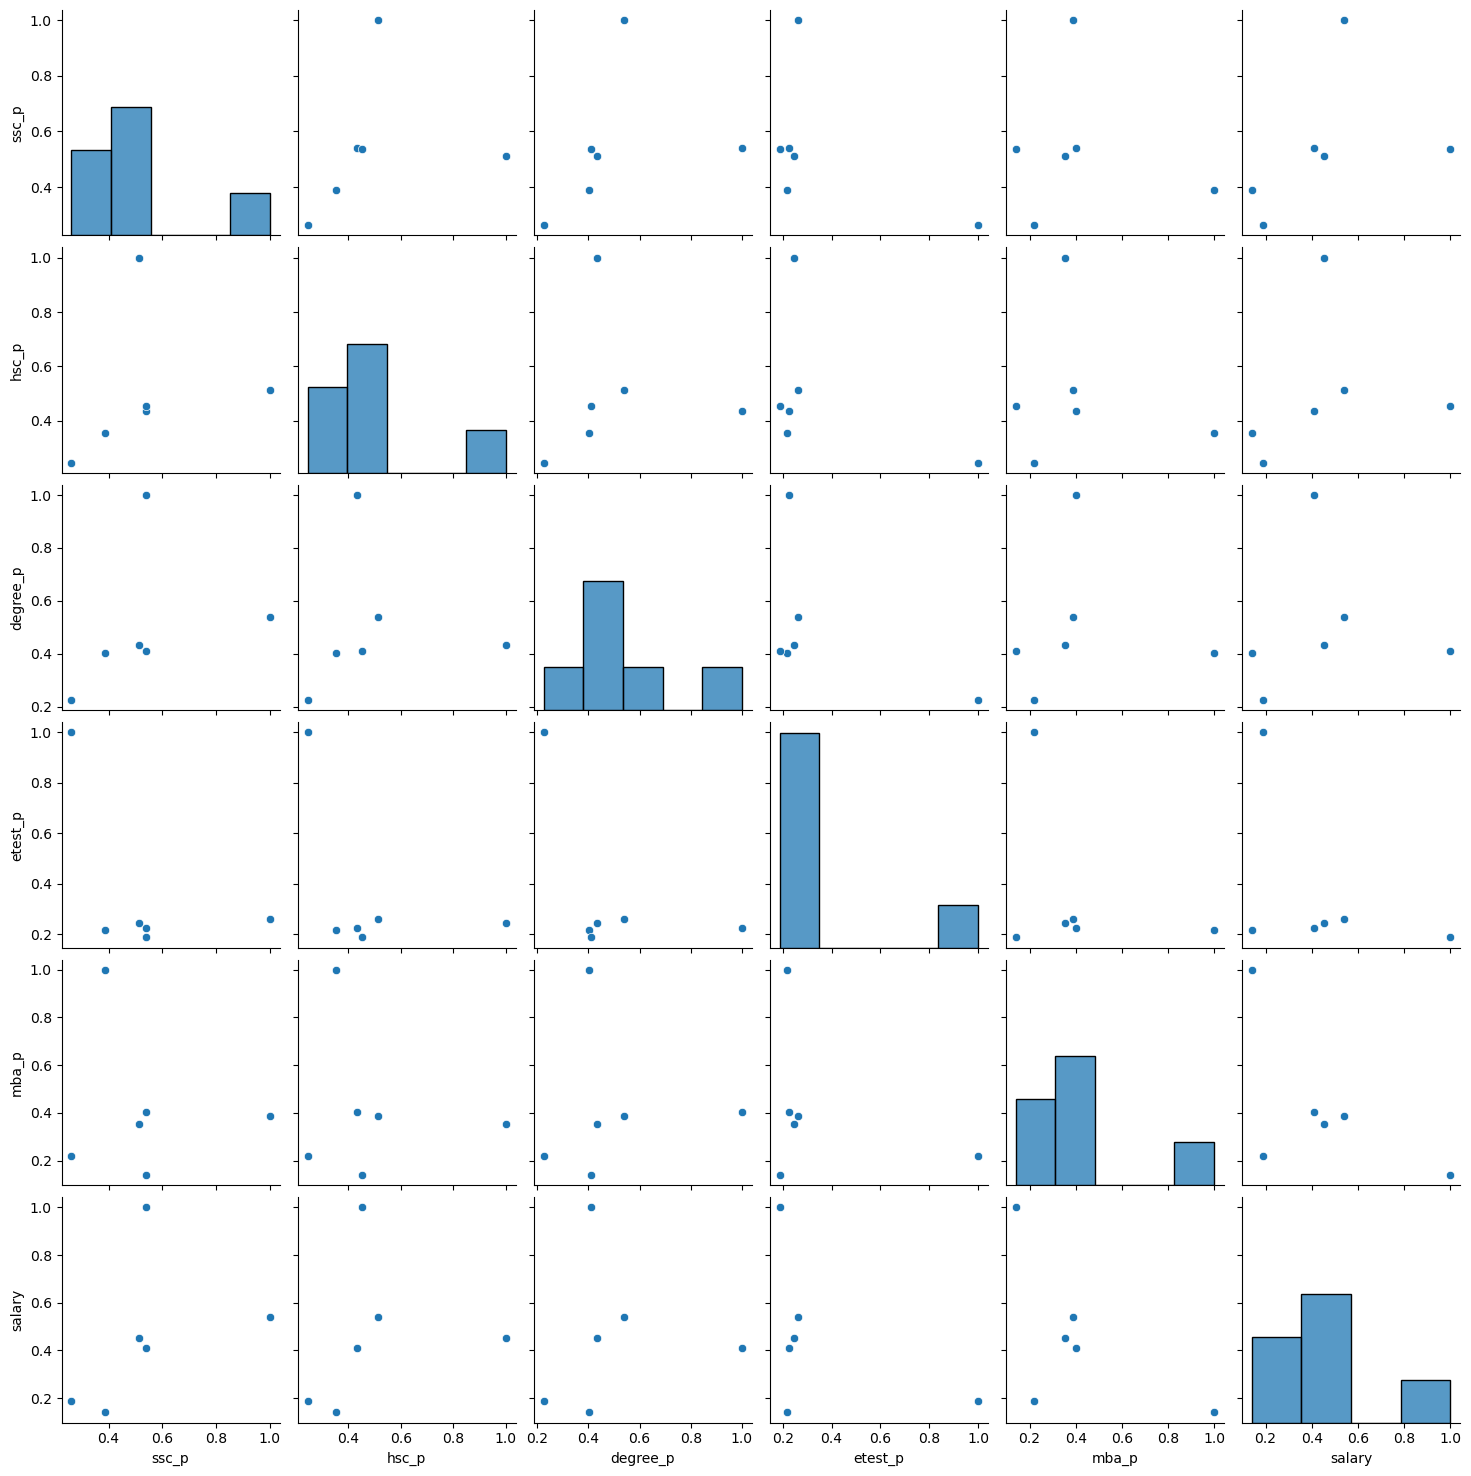

In [47]:
sns.pairplot(cor_num)

In [48]:
corr_matrix = cor_num.corr()
print(corr_matrix)

             ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.256798  0.333645 -0.499586 -0.115403  0.413121
hsc_p     0.256798  1.000000  0.067590 -0.444063 -0.128867  0.225051
degree_p  0.333645  0.067590  1.000000 -0.503226  0.047232  0.084998
etest_p  -0.499586 -0.444063 -0.503226  1.000000 -0.312537 -0.455415
mba_p    -0.115403 -0.128867  0.047232 -0.312537  1.000000 -0.603257
salary    0.413121  0.225051  0.084998 -0.455415 -0.603257  1.000000


In [49]:
X=cor_num.drop(columns=['salary'])
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000
salary,0.538090,0.452569,0.408371,0.186988,0.139823


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):
    
    vif_data=pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data



In [50]:
vif_cal(cor_num)

,feature,VIF
0,ssc_p,9.363286
1,hsc_p,5.186345
2,degree_p,5.541162
3,etest_p,1.619142
4,mba_p,3.237513
5,salary,5.322989


In [51]:
X = dataset[num_cols].copy()
X_const = add_constant(X)
X_const

,const,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1.0,67.00,91.00,58.00,55.0,58.80
1,1.0,79.33,78.33,77.48,86.5,66.28
2,1.0,65.00,68.00,64.00,75.0,57.80
3,1.0,56.00,52.00,52.00,66.0,59.43
4,1.0,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...,...
210,1.0,80.60,82.00,77.60,91.0,74.49
211,1.0,58.00,60.00,72.00,74.0,53.62
212,1.0,67.00,67.00,73.00,59.0,69.72
213,1.0,74.00,66.00,58.00,70.0,60.23


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Only predictors (exclude target)
X = dataset[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]  

# Add constant
X_const = add_constant(X)

vif_df = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

print(vif_df)


    Feature         VIF
0     const  148.690216
1     ssc_p    1.685534
2     hsc_p    1.470633
3  degree_p    1.555590
4   etest_p    1.109339
5     mba_p    1.296069


Numeric predictors: ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

Covariance Matrix
                 ssc_p         hsc_p     degree_p        etest_p  \
ssc_p       117.228377     60.348373    42.897137      37.659225   
hsc_p        60.348373    118.755706    34.819820      35.461678   
degree_p     42.897137     34.819820    54.151103      21.929469   
etest_p      37.659225     35.461678    21.929469     176.251018   
mba_p        24.535952     22.555846    17.272020      16.886973   
salary    19767.643976  46008.057275 -8064.357161  157157.850783   

                 mba_p        salary  
ssc_p        24.535952  1.976764e+04  
hsc_p        22.555846  4.600806e+04  
degree_p     17.272020 -8.064357e+03  
etest_p      16.886973  1.571579e+05  
mba_p        34.028376  6.611551e+04  
salary    66115.509283  5.999726e+09  


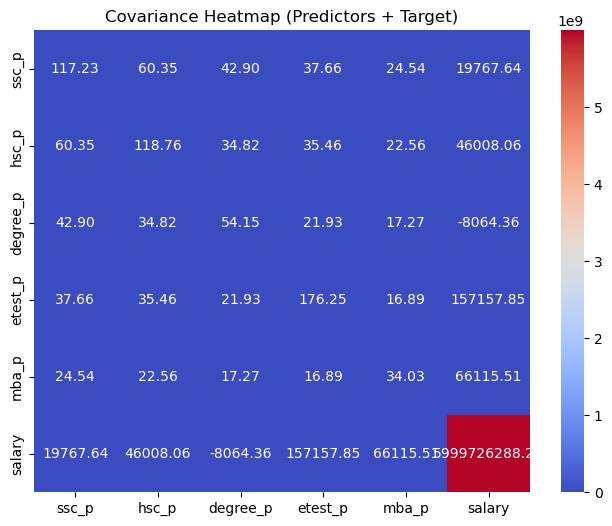


 Correlation Matrix
             ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.023571
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.054506
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364 -0.014148
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.152829
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.146324
salary    0.023571  0.054506 -0.014148  0.152829  0.146324  1.000000


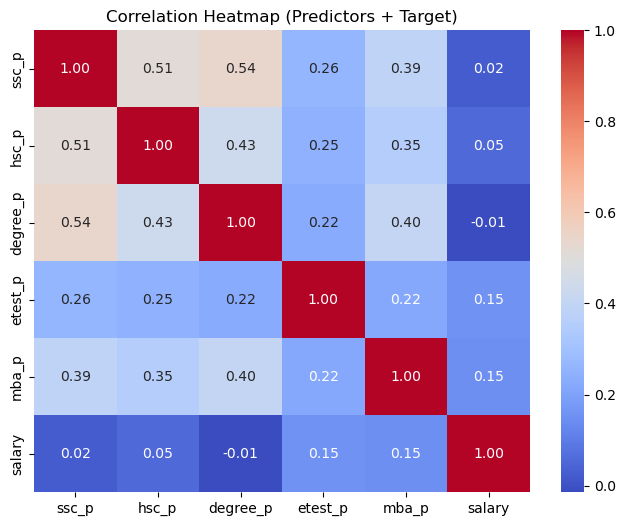


VIF (sorted) with interpretation:
    Feature         VIF      Interpretation
0     const  148.690216  high (problematic)
1     ssc_p    1.685534          acceptable
2     hsc_p    1.470633          acceptable
3  degree_p    1.555590          acceptable
4   etest_p    1.109339          acceptable
5     mba_p    1.296069          acceptable

 Regression Summary
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.087
Date:                Thu, 28 Aug 2025   Prob (F-statistic):             0.0684
Time:                        19:51:21   Log-Likelihood:                -2719.7
No. Observations:                 215   AIC:                             5451.
Df Residuals:                     209   BIC:                             5472.
Df M

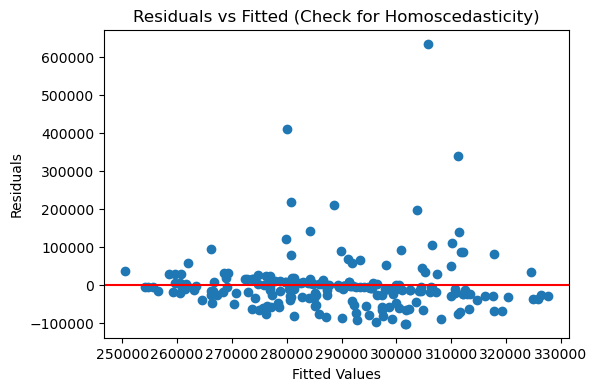

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

dataset = pd.read_csv("preplacement.csv")

# Identify predictors & target
target = "salary"
id_cols = ["sl_no"]
num_cols = dataset.select_dtypes(include="number").columns.drop(id_cols + [target]).tolist()

print("Numeric predictors:", num_cols)

# ======================
# 1. Covariance Matrix
# ======================
print("\nCovariance Matrix")
print(dataset[num_cols + [target]].cov())
plt.figure(figsize=(8,6))
sns.heatmap(dataset[num_cols + [target]].cov(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Heatmap (Predictors + Target)")
plt.show()

# =================

# ======================
# 2. Correlation Matrix
# ======================
print("\n Correlation Matrix")
print(dataset[num_cols + [target]].corr())

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dataset[num_cols + [target]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Predictors + Target)")
plt.show()

# ======================
# 3 & 4. Collinearity & Multicollinearity via VIF
# ======================
X = dataset[num_cols].copy()
#X_const = add_constant(X)

# vif_dataset = pd.DataFrame({
#     "Feature": X.columns,
#
X_const = add_constant(X)

vif_dataset = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})
def interpret_vif(v):
    if v < 5:
        return "acceptable"
    elif v < 10:
        return "moderate (watch)"
    else:
        return "high (problematic)"

vif_dataset["Interpretation"] = vif_dataset["VIF"].apply(interpret_vif)
print("\nVIF (sorted) with interpretation:")
print(vif_dataset)

# ======================
# 5. Regression model for residuals
# ======================
X_reg = sm.add_constant(dataset[num_cols])
y = dataset[target]
model = sm.OLS(y, X_reg).fit()
print("\n Regression Summary")
print(model.summary())

# ======================
# 6. Homoscedasticity / Heteroscedasticity Check
# ======================
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted plot
plt.figure(figsize=(6,4))
plt.scatter(fitted, residuals)
plt.axhline(y=0, color="red", linestyle="-")
plt.title("Residuals vs Fitted (Check for Homoscedasticity)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# # Breusch-Pagan test
# bp_test = het_breuschpagan(residuals, model.model.exog)
# labels = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
# print("\nBreusch-Pagan Test for Heteroscedasticity")
# print(dict(zip(labels, bp_test)))
